## K_optimization code from Per

In [ ]:
sith_params1 = {"in_features":32, 
                        "tau_min":1, "tau_max":50, 
                        "k":15, 'dt':1,
                        "ntau":10, 'g':0.0,  
                        "ttype":ttype, 
                        "hidden_size":20, "act_func":nn.ReLU()}

sith_params2 = {"in_features":sith_params1['hidden_size'], 
                        "tau_min":1, "tau_max":200.0,  
                        "k":10, 'dt':1,
                        "ntau":10, 'g':0.0, 
                        "ttype":ttype, 
                        "hidden_size":20, "act_func":nn.ReLU()}
sith_params3 = {"in_features":sith_params2['hidden_size'], 
                    "tau_min":1, "tau_max":800.0,  
                    "k":5, 'dt':1,
                    "ntau":10, 'g':0.0, 
                    "ttype":ttype, 
                    "hidden_size":20, "act_func":nn.ReLU()}
        

In [14]:
import scipy.optimize as opt
#from deepsith import iSITH
# currently use this as a work around for Rivanna to inport iSith
import sys
sys.path.append("../SITH_Layer-master/")
from sith import iSITH
from sith import deep_isith
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)


   direc: array([[-0.4435581]])
     fun: 0.16546026
 message: 'Optimization terminated successfully.'
    nfev: 44
     nit: 2
  status: 0
 success: True
       x: array(7.2406326)
ntau: 10 k: 7


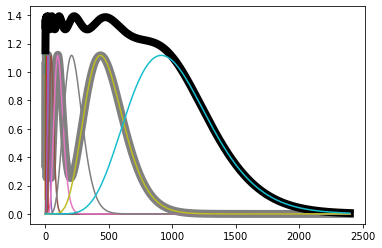

In [20]:
def min_fun(x, *args):
    ntau = int(args[2])
    k = int(x[0])
    if k < 4 or k>125:
        return np.inf
    tau_min = args[0]
    tau_max = args[1]    
    ev = iSITH(tau_min=tau_min, tau_max=tau_max, buff_max=tau_max*5, k=k, ntau=ntau, dt=1, g=1.0)    
    std_0 = ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1].sum(1)[int(tau_min):int(tau_max)].std()
    std_1 = ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1, ::2].sum(1)[int(tau_min):int(tau_max)].std()    
    to_min = std_0/std_1
    return to_min

ntau_0 = 10
k_0 = 10
tau_min = 1.
tau_max = 800.
res = opt.minimize(min_fun, [k_0], args=(tau_min, tau_max, ntau_0), 
                   #method='Nelder-Mead',
                   method='Powell',
                   #method='L-BFGS-B',
                   #method='BFGS',
                   #method='CG',
                   #method='TNC',
                   bounds=[(4, 125)]
                  )
print(res)
ntau = ntau_0
k = int(res.x)
print('ntau:', ntau, 'k:', k)
ev = iSITH(tau_min=tau_min, tau_max=tau_max, buff_max=tau_max*3, k=k, ntau=ntau, dt=1.0, g=1.0)
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1, ::2].sum(1),
        linewidth=8, color='grey');
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1].sum(1),
        linewidth=8, color='black');
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1],
       );

## Result

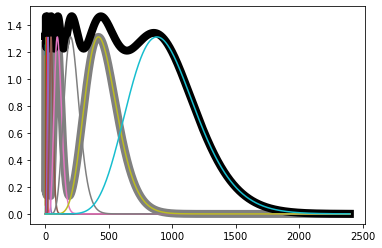

In [24]:
ev = iSITH(tau_min=tau_min, tau_max=tau_max, buff_max=tau_max*3, k=10, ntau=ntau, dt=1.0, g=1.0)
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1, ::2].sum(1),
        linewidth=8, color='grey');
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1].sum(1),
        linewidth=8, color='black');
plt.plot(ev.filters[:, 0, 0, :].detach().cpu().T.numpy()[::-1],
       );

In [ ]:
sith_params1 = {"in_features":32, 
                        "tau_min":1, "tau_max":50, 
                        "k":23, 'dt':1,
                        "ntau":10, 'g':0.0,  
                        "ttype":ttype, 
                        "hidden_size":20, "act_func":nn.ReLU()}

sith_params2 = {"in_features":sith_params1['hidden_size'], 
                        "tau_min":1, "tau_max":200.0,  
                        "k":12, 'dt':1,
                        "ntau":10, 'g':0.0, 
                        "ttype":ttype, 
                        "hidden_size":20, "act_func":nn.ReLU()}
sith_params3 = {"in_features":sith_params2['hidden_size'], 
                    "tau_min":1, "tau_max":800.0,  
                    "k":7, 'dt':1,
                    "ntau":10, 'g':0.0, 
                    "ttype":ttype, 
                    "hidden_size":20, "act_func":nn.ReLU()}